In [1]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-4]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-4:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
1     rs8077028_T
2     rs2244526_T
3    rs17022021_T
4     rs1034435_A
5     rs4760243_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-4:
rs8077028_T
rs2244526_T
rs17022021_T
rs1034435_A
rs4760243_A
rs7260181_T
rs12716755_A
rs3820443_T
rs846858_A
rs5771225_T
rs7313581_T
rs2699450_A
rs6945197_T
rs184992198_T
rs115972394_A
rs73215707_T
rs79926713_T
rs73732514_A
rs62177277_T
rs73681522_A
rs2234017_C
rs147597631_T
rs145848414_A
rs147985478_A
rs116050881_T
rs186542490_A
rs186076999_T
rs141521929_T
rs73865608_A
rs184614511_T
rs193129245_A
rs150061627_T
rs190457471_A
rs141387448_T
rs117760708_T
rs187423924_A
rs181634374_T
rs145228677_C
rs188699384_A
rs148003968_A
rs185867524_A
rs117756856_A
rs184457411_A
rs180751169_T
rs188392327_A
rs192232892_T
rs149839

In [2]:
import pandas as pd
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\436810400.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)


In [3]:
len(data_with_no_filtering.columns)

592538

In [4]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs4255357_G is in the list
rs2970989_T is in the list
rs1552244_A is in the list
rs17022021_T is in the list
rs9832461_A is in the list
rs17785248_A is in the list
rs4974424_A is in the list
rs1923775_T is in the list
rs1448284_T is in the list
rs10012882_T is in the list
rs13178362_T is in the list
rs29745_A is in the list
rs6882046_A is in the list
rs543844_A is in the list
rs9381563_T is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs7016182_C is in the list
rs956225_A is in the list
rs474951_T is in the list
rs7155434_A is in the list
rs10498633_G is in the list
rs2456930_G is in the list
rs8049439_T is in the list
rs450674_T is in the list
rs16973424_A is in the list
rs440277_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs4255357_G', 'rs2970989_T', 'rs1552244_A', 'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A', 'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T', 'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs93815

In [5]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\990478919.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [6]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs4255357_G     7
rs2970989_T     0
rs1552244_A     0
rs17022021_T    0
rs9832461_A     0
rs17785248_A    4
rs4974424_A     2
rs1923775_T     0
rs1448284_T     0
rs10012882_T    2
rs13178362_T    1
rs29745_A       1
rs6882046_A     2
rs543844_A      0
rs9381563_T     9
rs2718058_A     1
rs11771145_G    0
rs7016182_C     0
rs956225_A      0
rs474951_T      1
rs7155434_A     2
rs10498633_G    0
rs2456930_G     1
rs8049439_T     0
rs450674_T      0
rs16973424_A    1
rs440277_G      0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [7]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\4016535944.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')


In [8]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs4255357_G', 'rs2970989_T', 'rs1552244_A',
       'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A',
       'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T',
       'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs9381563_T', 'rs2718058_A',
       'rs11771145_G', 'rs7016182_C', 'rs956225_A', 'rs474951_T',
       'rs7155434_A', 'rs10498633_G', 'rs2456930_G', 'rs8049439_T',
       'rs450674_T', 'rs16973424_A', 'rs440277_G', 'rs8106922_A', 'rs5167_T',
       'DX'],
      dtype='object')


In [9]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [10]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)
C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [11]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 0, 'Dementia': 1}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_11708\2107091537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)


In [12]:
print(data_cleaned_with_just_dx_and_snp['DX'].value_counts())

DX
0    577
1    180
Name: count, dtype: int64


In [13]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [14]:
# train and test split
from sklearn.model_selection import train_test_split
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']


=== Evaluating: Logistic Regression ===
Accuracy:            0.8394
Balanced Accuracy:   0.5314
F1 Score (macro):    0.5326
Recall (Sensitivity):0.5314
ROC AUC Score:       0.5384
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       118
           1       0.29      0.11      0.15        19

    accuracy                           0.84       137
   macro avg       0.58      0.53      0.53       137
weighted avg       0.79      0.84      0.81       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8613
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4627
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4429
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       118
           1       0.00      0.00      0.00        19

    accuracy                           0.86       137
   macro avg       0.43      0.50      0.46       137


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.8467
Balanced Accuracy:   0.5136
F1 Score (macro):    0.5016
Recall (Sensitivity):0.5136
ROC AUC Score:       0.5731
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       118
           1       0.25      0.05      0.09        19

    accuracy                           0.85       137
   macro avg       0.56      0.51      0.50       137
weighted avg       0.78      0.85      0.80       137


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.8540
Balanced Accuracy:   0.5399
F1 Score (macro):    0.5433
Recall (Sensitivity):0.5399
ROC AUC Score:       0.5740
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       118
           1       0.40      0.11      0.17        19

    accuracy                           0.85       137
   macro avg       0.64      0.54      0.54       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: HistGradientBoosting ===
Accuracy:            0.8102
Balanced Accuracy:   0.5366
F1 Score (macro):    0.5400
Recall (Sensitivity):0.5366
ROC AUC Score:       0.4492
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       118
           1       0.23      0.16      0.19        19

    accuracy                           0.81       137
   macro avg       0.55      0.54      0.54       137
weighted avg       0.78      0.81      0.79       137



c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.8175
Balanced Accuracy:   0.5408
F1 Score (macro):    0.5453
Recall (Sensitivity):0.5408
ROC AUC Score:       0.4955
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       118
           1       0.25      0.16      0.19        19

    accuracy                           0.82       137
   macro avg       0.56      0.54      0.55       137
weighted avg       0.79      0.82      0.80       137



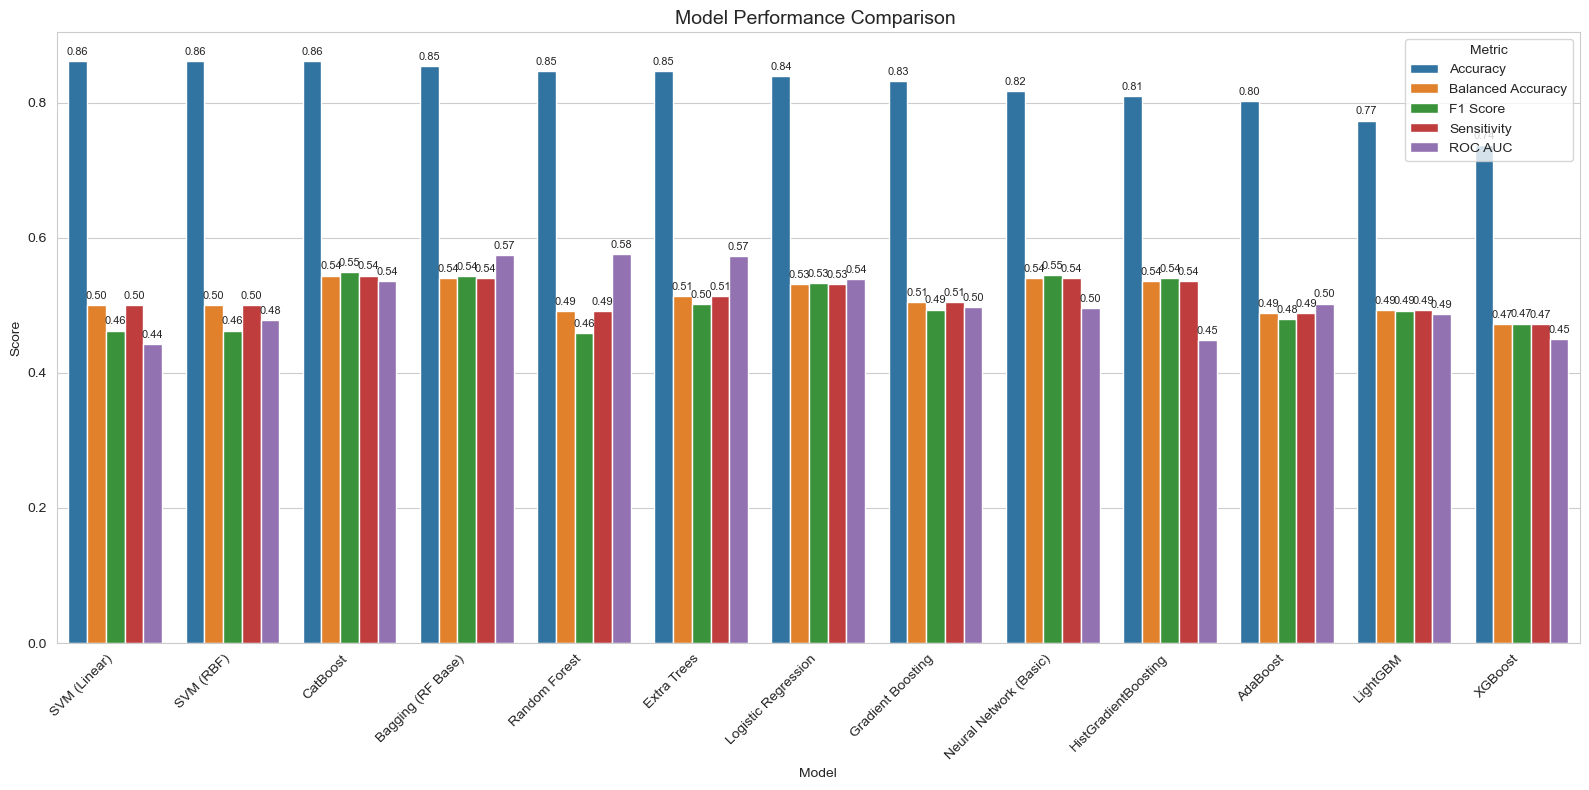

In [15]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.5985
Balanced Accuracy:   0.5682
F1 Score (macro):    0.4951
Recall (Sensitivity):0.5682
ROC AUC Score:       0.5040
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       118
           1       0.18      0.53      0.27        19

    accuracy                           0.60       137
   macro avg       0.53      0.57      0.50       137
weighted avg       0.79      0.60      0.66       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.6058
Balanced Accuracy:   0.5725
F1 Score (macro):    0.5001
Recall (Sensitivity):0.5725
ROC AUC Score:       0.5183
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       118
           1       0.18      0.53      0.27        19

    accuracy                           0.61       137
   macro avg       0.54      0.57      0.50       137


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.7664
Balanced Accuracy:   0.4891
F1 Score (macro):    0.4883
Recall (Sensitivity):0.4891
ROC AUC Score:       0.5319
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       118
           1       0.12      0.11      0.11        19

    accuracy                           0.77       137
   macro avg       0.49      0.49      0.49       137
weighted avg       0.76      0.77      0.76       137


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.7226
Balanced Accuracy:   0.5299
F1 Score (macro):    0.5201
Recall (Sensitivity):0.5299
ROC AUC Score:       0.5928
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       118
           1       0.17      0.26      0.21        19

    accuracy                           0.72       137
   macro avg       0.52      0.53      0.52       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.6277
Balanced Accuracy:   0.5631
F1 Score (macro):    0.5060
Recall (Sensitivity):0.5631
ROC AUC Score:       0.4835
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       118
           1       0.18      0.47      0.26        19

    accuracy                           0.63       137
   macro avg       0.53      0.56      0.51       137
weighted avg       0.79      0.63      0.68       137


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.7007
Balanced Accuracy:   0.5172
F1 Score (macro):    0.5061
Recall (Sensitivity):0.5172
ROC AUC Score:       0.5174
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       118
           1       0.16      0.26      0.20        19

    accuracy                           0.70       137
   macro avg       0.51      0.52      0.51       137
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6788
Balanced Accuracy:   0.5265
F1 Score (macro):    0.5062
Recall (Sensitivity):0.5265
ROC AUC Score:       0.4764
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       118
           1       0.16      0.32      0.21        19

    accuracy                           0.68       137
   macro avg       0.52      0.53      0.51       137
weighted avg       0.77      0.68      0.72       137



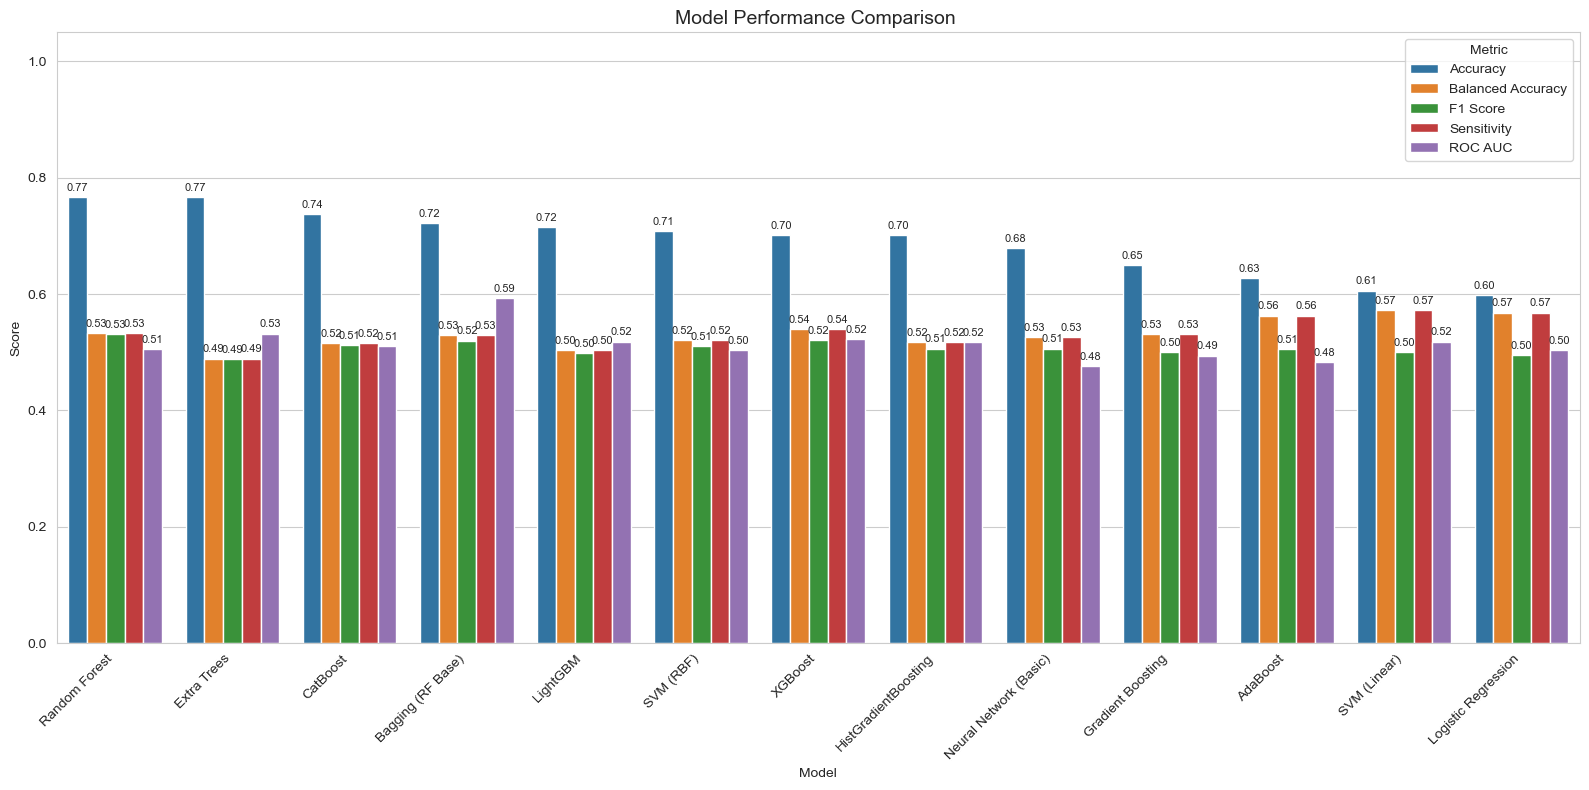

In [16]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=141)

# Apply SMOTE
smote = ADASYN(random_state=141)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.5592
Balanced Accuracy:   0.4430
F1 Score (macro):    0.4448
Recall (Sensitivity):0.4430
ROC AUC Score:       0.4691
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       114
           1       0.18      0.21      0.19        38

    accuracy                           0.56       152
   macro avg       0.45      0.44      0.44       152
weighted avg       0.58      0.56      0.57       152


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5855
Balanced Accuracy:   0.4605
F1 Score (macro):    0.4613
Recall (Sensitivity):0.4605
ROC AUC Score:       0.4721
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       114
           1       0.20      0.21      0.20        38

    accuracy                           0.59       152
   macro avg       0.46      0.46      0.46       152


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.75      0.81      0.78       114
           1       0.24      0.18      0.21        38

    accuracy                           0.65       152
   macro avg       0.49      0.50      0.49       152
weighted avg       0.62      0.65      0.63       152


=== Evaluating: Extra Trees ===
Accuracy:            0.7368
Balanced Accuracy:   0.5351
F1 Score (macro):    0.5213
Recall (Sensitivity):0.5351
ROC AUC Score:       0.5048
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       114
           1       0.42      0.13      0.20        38

    accuracy                           0.74       152
   macro avg       0.59      0.54      0.52       152
weighted avg       0.68      0.74      0.68       152


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.6974
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4821
Recall (Sensitivity):0.5000

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: HistGradientBoosting ===
Accuracy:            0.6711
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4935
Recall (Sensitivity):0.5000
ROC AUC Score:       0.4979
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       114
           1       0.25      0.16      0.19        38

    accuracy                           0.67       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.62      0.67      0.64       152



c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6316
Balanced Accuracy:   0.4649
F1 Score (macro):    0.4581
Recall (Sensitivity):0.4649
ROC AUC Score:       0.5069
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       114
           1       0.18      0.13      0.15        38

    accuracy                           0.63       152
   macro avg       0.46      0.46      0.46       152
weighted avg       0.60      0.63      0.61       152



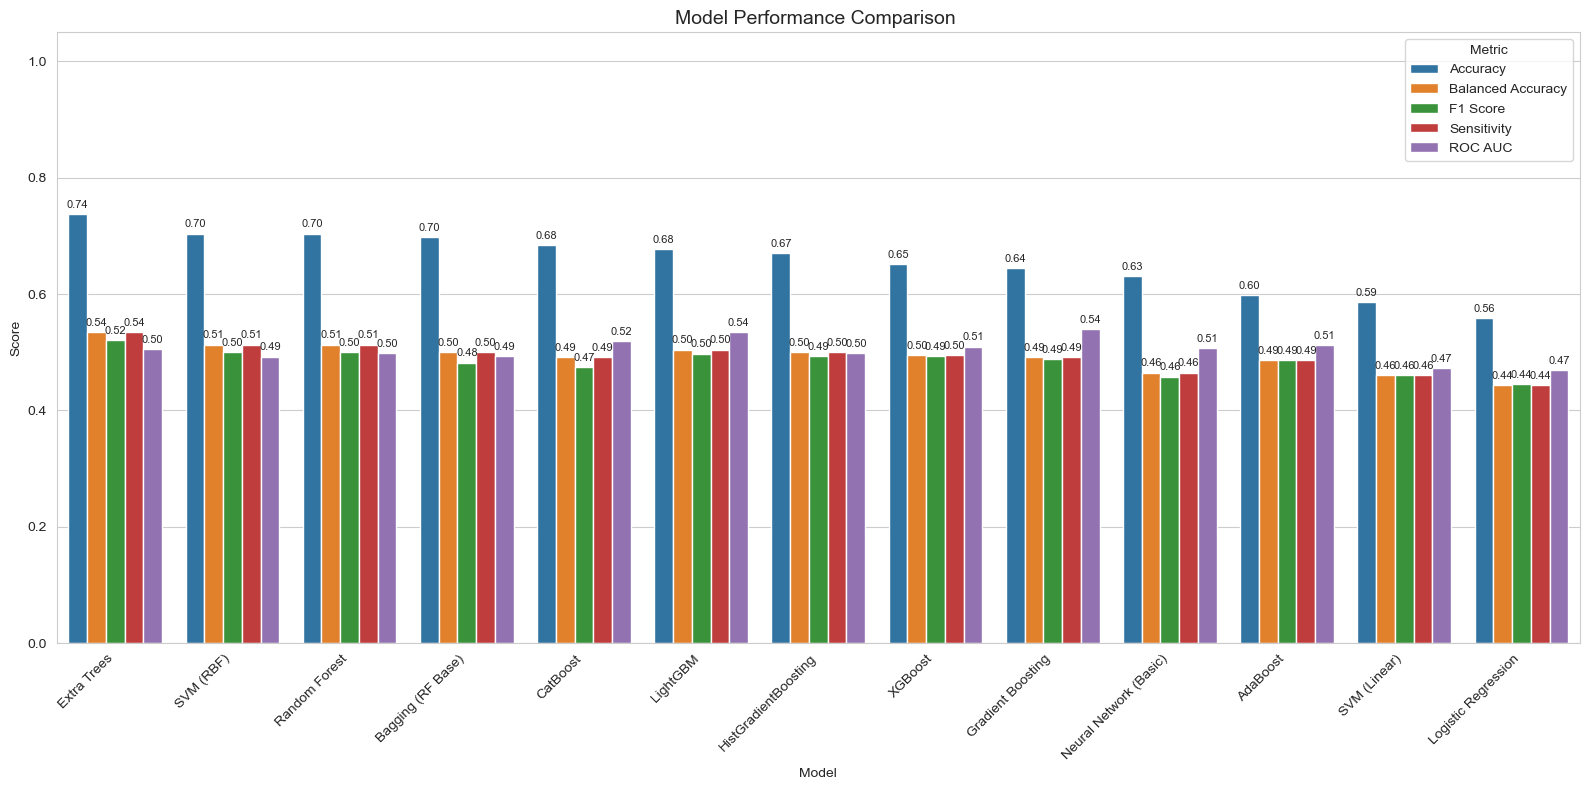

In [17]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.4408
Balanced Accuracy:   0.5219
F1 Score (macro):    0.4353
Recall (Sensitivity):0.5219
ROC AUC Score:       0.5173
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49       114
           1       0.26      0.68      0.38        38

    accuracy                           0.44       152
   macro avg       0.52      0.52      0.44       152
weighted avg       0.65      0.44      0.46       152


=== Evaluating: SVM (Linear) ===
Accuracy:            0.4145
Balanced Accuracy:   0.4868
F1 Score (macro):    0.4087
Recall (Sensitivity):0.4868
ROC AUC Score:       0.4977
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.34      0.47       114
           1       0.24      0.63      0.35        38

    accuracy                           0.41       152
   macro avg       0.49      0.49      0.41       152


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.5066
Balanced Accuracy:   0.5132
F1 Score (macro):    0.4755
Recall (Sensitivity):0.5132
ROC AUC Score:       0.5482
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.50      0.60       114
           1       0.26      0.53      0.35        38

    accuracy                           0.51       152
   macro avg       0.51      0.51      0.48       152
weighted avg       0.63      0.51      0.54       152


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.5461
Balanced Accuracy:   0.5132
F1 Score (macro):    0.4934
Recall (Sensitivity):0.5132
ROC AUC Score:       0.5428
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       114
           1       0.26      0.45      0.33        38

    accuracy                           0.55       152
   macro avg       0.51      0.51      0.49       152
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: HistGradientBoosting ===
Accuracy:            0.4671
Balanced Accuracy:   0.4693
F1 Score (macro):    0.4373
Recall (Sensitivity):0.4693
ROC AUC Score:       0.4991
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.46      0.57       114
           1       0.23      0.47      0.31        38

    accuracy                           0.47       152
   macro avg       0.48      0.47      0.44       152
weighted avg       0.60      0.47      0.50       152



c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.4605
Balanced Accuracy:   0.4825
F1 Score (macro):    0.4387
Recall (Sensitivity):0.4825
ROC AUC Score:       0.4940
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.44      0.55       114
           1       0.24      0.53      0.33        38

    accuracy                           0.46       152
   macro avg       0.49      0.48      0.44       152
weighted avg       0.61      0.46      0.49       152



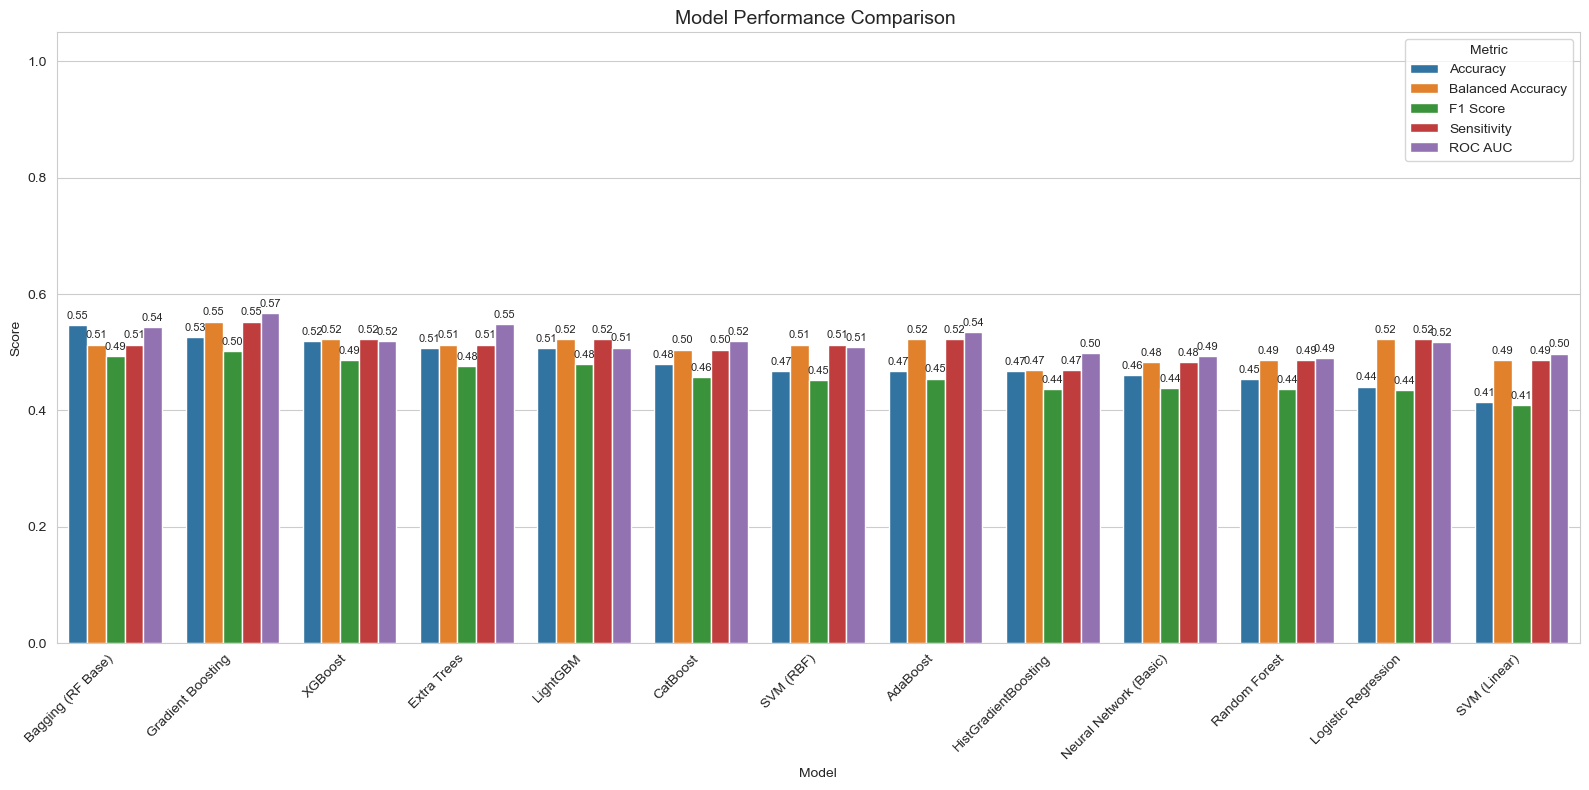

In [18]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()



=== Evaluating: Logistic Regression ===
Accuracy:            0.5592
Balanced Accuracy:   0.4342
F1 Score (macro):    0.4362
Recall (Sensitivity):0.4342
ROC AUC Score:       0.4765
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       114
           1       0.16      0.18      0.17        38

    accuracy                           0.56       152
   macro avg       0.44      0.43      0.44       152
weighted avg       0.58      0.56      0.57       152


=== Evaluating: SVM (Linear) ===
Accuracy:            0.5789
Balanced Accuracy:   0.4474
F1 Score (macro):    0.4482
Recall (Sensitivity):0.4474
ROC AUC Score:       0.4811
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       114
           1       0.17      0.18      0.18        38

    accuracy                           0.58       152
   macro avg       0.45      0.45      0.45       152


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Evaluating: Extra Trees ===
Accuracy:            0.7237
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4621
Recall (Sensitivity):0.5000
ROC AUC Score:       0.5217
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       114
           1       0.25      0.05      0.09        38

    accuracy                           0.72       152
   macro avg       0.50      0.50      0.46       152
weighted avg       0.62      0.72      0.65       152


=== Evaluating: Bagging (RF Base) ===
Accuracy:            0.6513
Balanced Accuracy:   0.4693
F1 Score (macro):    0.4565
Recall (Sensitivity):0.4693
ROC AUC Score:       0.4849
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       114
           1       0.17      0.11      0.13        38

    accuracy                           0.65       152
   macro avg       0.46      0.47      0.46       152
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Evaluating: AdaBoost ===
Accuracy:            0.5987
Balanced Accuracy:   0.4868
F1 Score (macro):    0.4867
Recall (Sensitivity):0.4868
ROC AUC Score:       0.5312
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       114
           1       0.23      0.26      0.25        38

    accuracy                           0.60       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.62      0.60      0.61       152


=== Evaluating: HistGradientBoosting ===
Accuracy:            0.6776
Balanced Accuracy:   0.5044
F1 Score (macro):    0.4975
Recall (Sensitivity):0.5044
ROC AUC Score:       0.5395
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       114
           1       0.26      0.16      0.20        38

    accuracy                           0.68       152
   macro avg       0.51      0.50      0.50       152
wei

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Evaluating: Neural Network (Basic) ===
Accuracy:            0.6316
Balanced Accuracy:   0.4649
F1 Score (macro):    0.4581
Recall (Sensitivity):0.4649
ROC AUC Score:       0.4998
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       114
           1       0.18      0.13      0.15        38

    accuracy                           0.63       152
   macro avg       0.46      0.46      0.46       152
weighted avg       0.60      0.63      0.61       152



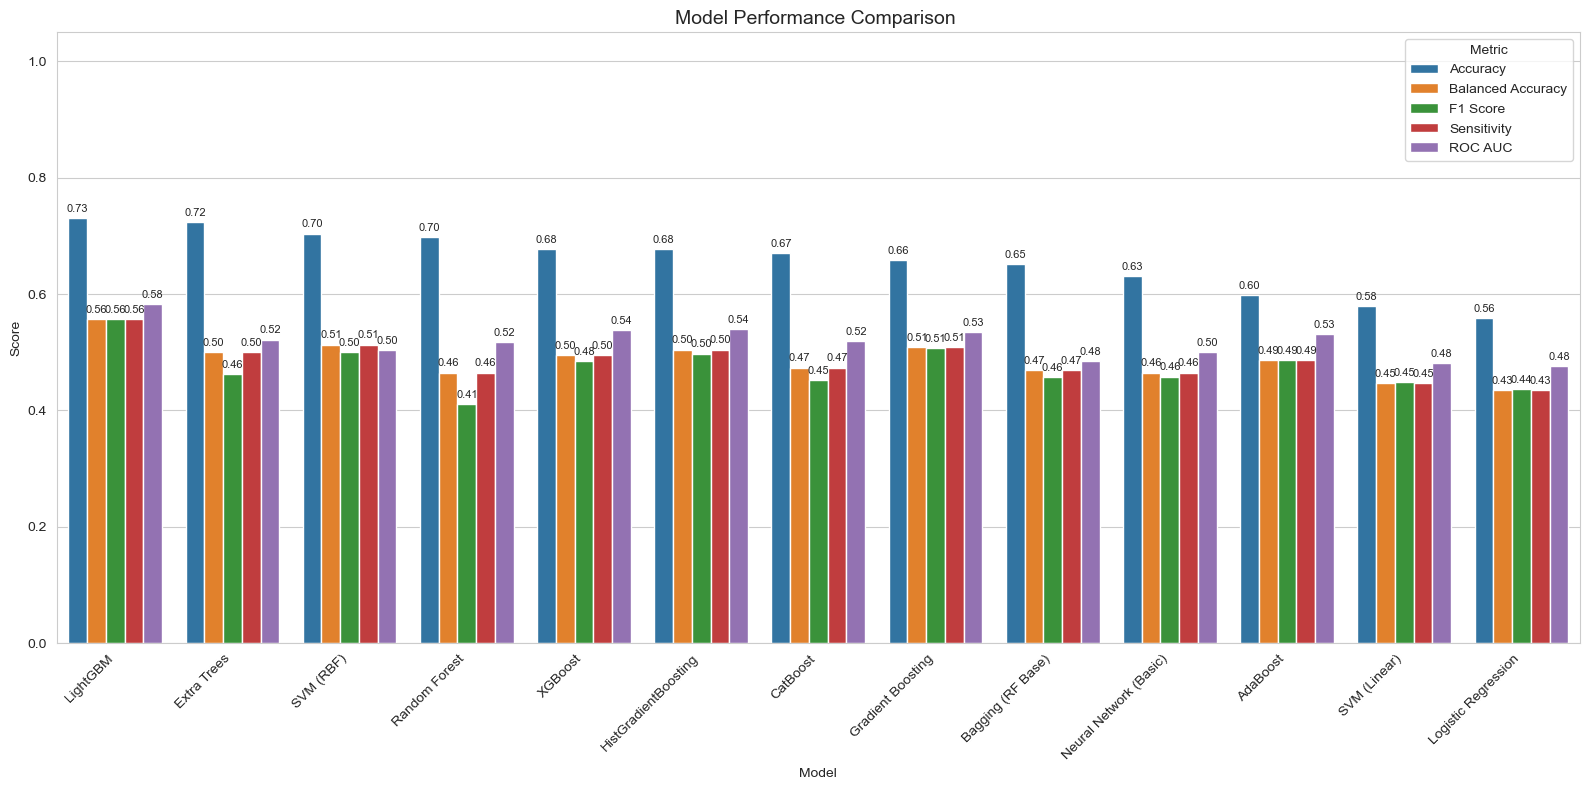

In [19]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE  # <--- Added import
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTETomek(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Show all value labels, even for same height bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.ylim(0, 1.05)  # ensure full space for value labels
plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


In [15]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    matthews_corrcoef, recall_score, roc_auc_score
)

from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Assume X and y are defined
# ---------------------

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "Slow Deeper Neural Net": MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=400, random_state=42),
    "Deep Neural Net": MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=400, random_state=42),
}

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_models(X_train, X_test, y_train, y_test):
    result_rows = []
    for name, model in base_models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            mcc = matthews_corrcoef(y_test, y_pred)
            sensitivity = recall_score(y_test, y_pred, average='macro')

            try:
                if hasattr(model, "predict_proba"):
                    y_score = model.predict_proba(X_test)[:, 1]
                else:
                    y_score = model.decision_function(X_test)
                roc_auc = roc_auc_score(y_test, y_score)
            except:
                roc_auc = np.nan

            result_rows.append([name, acc, bal_acc, f1, mcc, sensitivity, roc_auc])

        except Exception as e:
            print(f"Error with model {name}: {e}")

    # Create and display result table
    df = pd.DataFrame(result_rows, columns=[
        "Model", "Accuracy", "BalancedAccuracy", "F1", "MCC", "Sensitivity", "ROC_AUC"
    ])
    df = df.sort_values(by="Accuracy", ascending=False)

    print(df.to_string(index=False, float_format="%.6f"))

# ---------------------
# Loop over random states and test sizes
# ---------------------
for rs in range(1, 162):
    for test_size in np.round(np.arange(0.20, 0.31, 0.01), 2):
        print(f"\n===== Random State: {rs}, Test Size: {test_size} =====")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rs)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        evaluate_models(X_train, X_test, y_train, y_test)



===== Random State: 1, Test Size: 0.2 =====
                 Model  Accuracy  BalancedAccuracy       F1       MCC  Sensitivity  ROC_AUC
          SVM (Linear)  0.763158          0.500000 0.432836  0.000000     0.500000 0.486351
             SVM (RBF)  0.763158          0.500000 0.432836  0.000000     0.500000 0.420498
         Random Forest  0.763158          0.500000 0.432836  0.000000     0.500000 0.541786
              AdaBoost  0.763158          0.528736 0.502726  0.125481     0.528736 0.559866
   Logistic Regression  0.756579          0.505268 0.455830  0.032205     0.505268 0.536398
              CatBoost  0.756579          0.495690 0.430712 -0.045335     0.495690 0.590038
     Gradient Boosting  0.743421          0.506226 0.471799  0.025257     0.506226 0.637452
              LightGBM  0.730263          0.507184 0.484063  0.023576     0.507184 0.569444
      MLP (Neural Net)  0.730263          0.564655 0.568869  0.153410     0.564655 0.622605
  HistGradientBoosting  0.723684   

In [24]:
# ---------------------
# Import Libraries
# ---------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import numpy as np

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X_train, X_test, y_train, y_test are already defined (feature and target datasets)
# Example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
     "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Define DNN Model
# def create_dnn_model(input_dim):
#     model = Sequential([
#         Dense(64, input_dim=input_dim, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')  # Sigmoid for binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    
    # For DNN, predict probabilities and convert to binary predictions
    # if name.startswith("Deep Neural Network"):
    #     y_pred_prob = model.predict(X_test)  # This gives probabilities
    #     y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)
    # else:
    y_pred = model.predict(X_test)
    
    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score (macro):    {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (macro):      {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1
        else:
            y_score = model.decision_function(X_test)
        
        roc_auc = roc_auc_score(y_test, y_score)
        print(f"ROC AUC Score:       {roc_auc:.4f}")
    except Exception as e:
        print(f"ROC AUC Score:       Not available ({e})")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run Models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    # if name.startswith("Deep Neural Network"):
    #     # For deep learning models, directly evaluate after training
    #     input_dim = X_train.shape[1]
    #     model = create_dnn_model(input_dim)
    #     evaluate_model(name, model, X_train, y_train, X_test, y_test)
    # else:
        # Evaluate other models
    evaluate_model(name, model, X_train, y_train, X_test, y_test)



=== Running: Logistic Regression ===


=== Evaluating: Logistic Regression ===
Accuracy:            0.8158
Balanced Accuracy:   0.5013
F1 Score (macro):    0.4822
Recall (macro):      0.5013
Sensitivity (Recall):0.5013
MCC:                 0.0049
ROC AUC Score:       0.5439
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       128
           1       0.17      0.04      0.07        24

    accuracy                           0.82       152
   macro avg       0.50      0.50      0.48       152
weighted avg       0.74      0.82      0.77       152


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8421
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4571
Recall (macro):      0.5000
Sensitivity (Recall):0.5000
MCC:                 0.0000
ROC AUC Score:       0.4746
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00 


=== Evaluating: Logistic Regression ===
Accuracy:            0.8394
Balanced Accuracy:   0.5314
F1 Score (macro):    0.5326
Recall (Sensitivity):0.5314
ROC AUC Score:       0.5384
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       118
           1       0.29      0.11      0.15        19

    accuracy                           0.84       137
   macro avg       0.58      0.53      0.53       137
weighted avg       0.79      0.84      0.81       137


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8613
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4627
Recall (Sensitivity):0.5000
ROC AUC Score:       0.5571
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       118
           1       0.00      0.00      0.00        19

    accuracy                           0.86       137
   macro avg       0.43      0.50      0.46       137


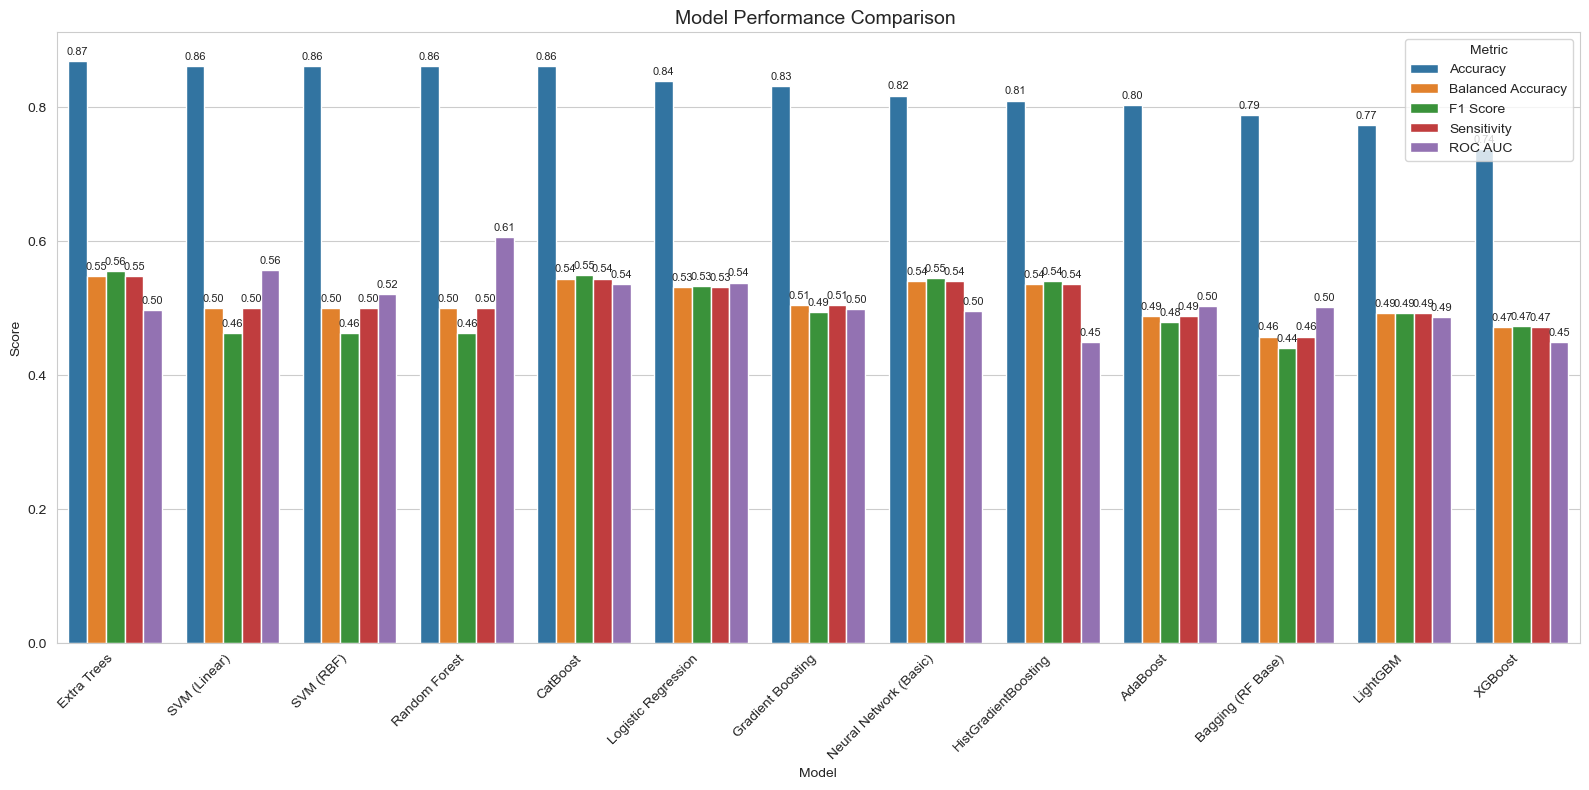

In [28]:
# ---------------------
# Import Libraries
# ---------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X and y are defined before this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear", probability=True),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging (RF Base)": BaggingClassifier(),
    "LightGBM": LGBMClassifier(verbosity=-1),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# ---------------------
# Evaluation Function
# ---------------------
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    sensitivity = recall_score(y_test, y_pred, average='macro')

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
    except:
        roc_auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1 Score": f1,
        "Sensitivity": sensitivity,
        "ROC AUC": roc_auc
    })

    print(f"\n=== Evaluating: {name} ===")
    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bal_acc:.4f}")
    print(f"F1 Score (macro):    {f1:.4f}")
    print(f"Recall (Sensitivity):{sensitivity:.4f}")
    print(f"ROC AUC Score:       {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run and Evaluate Models
# ---------------------
for name, model in base_models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# ---------------------
# Plot Results with Value Labels
# ---------------------
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by="Accuracy", ascending=False)

# Melt for seaborn
df_melted = df_results_sorted.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="tab10")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=8)

plt.title("Model Performance Comparison ", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Metric")
plt.show()


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,recall_score,
    confusion_matrix, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Ensure X and y are defined before running this script
# X, y = ...

results = []

# Use scaler for models sensitive to scale
scaling_needed = ["SVM", "K-Nearest", "MLP"]

model_grid_additional = {
    "Logistic Regression (Alt)": (
        LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced'),
        {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    ),
    "SVM (Linear, Alt)": (
        SVC(kernel='linear', probability=True, class_weight='balanced'),
        {
            'C': [0.1, 1, 10]
        }
    ),
    "SVM (RBF, Alt)": (
        SVC(kernel='rbf', probability=True, class_weight='balanced'),
        {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    ),
    "MLP (Basic)": (
        MLPClassifier(max_iter=1000),
        {
            'hidden_layer_sizes': [(64,), (128,)],
            'alpha': [0.0001, 0.001],
            'learning_rate_init': [0.001, 0.0005]
        }
    ),
    "MLP (Deep)": (
        MLPClassifier(max_iter=1500),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'alpha': [0.0005],
            'learning_rate_init': [0.001, 0.0005]
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', use_label_encoder=False, verbosity=0),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    ),
    "Random Forest (Alt)": (
        RandomForestClassifier(class_weight='balanced'),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_leaf': [1, 2]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.5, 1.0]
        }
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(),
        {
            'learning_rate': [0.01, 0.1],
            'max_iter': [100, 200]
        }
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    ),
    "LightGBM": (
        LGBMClassifier(class_weight='balanced', verbose=-1),
        {
            'n_estimators': [100, 200],
            'num_leaves': [31, 64],
            'learning_rate': [0.01, 0.1]
        }
    ),
    "CatBoost": (
        CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
        {
            'iterations': [100, 200],
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6]
        }
    ),
    "Stacked Ensemble": (
        StackingClassifier(
            estimators=[
                ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
                ('mlp', MLPClassifier(max_iter=1000))
            ],
            final_estimator=LogisticRegression(class_weight='balanced'),
            n_jobs=-1
        ),
        {}
    )
}

for seed in [42,66,87,141,20,69,90]:
    print(f"\n=== Random State: {seed} ===")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )

    for model_name, (base_model, param_grid) in model_grid_additional.items():
        print(f"\n--- {model_name} ---")

        # Inject random_state where applicable
        model = base_model
        if hasattr(model, 'random_state'):
            model.random_state = seed
        if isinstance(model, StackingClassifier):
            for _, est in model.estimators:
                if hasattr(est, 'random_state'):
                    est.random_state = seed
            if hasattr(model.final_estimator, 'random_state'):
                model.final_estimator.random_state = seed

        # Wrap in pipeline if scaling is needed
        if any(key in model_name for key in scaling_needed):
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', model)
            ])
            model_for_grid = pipeline
            param_grid = {'classifier__' + k: v for k, v in param_grid.items()}
        else:
            model_for_grid = model

        try:
            # GridSearchCV or direct fit
            if param_grid:
                grid = GridSearchCV(model_for_grid, param_grid, cv=3, scoring='balanced_accuracy', n_jobs=-1)
                grid.fit(X_train, y_train)
                best_model = grid.best_estimator_
                best_params = grid.best_params_
            else:
                best_model = model_for_grid.fit(X_train, y_train)
                best_params = "N/A"

            y_pred = best_model.predict(X_test)
            y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

            cm = confusion_matrix(y_test, y_pred)
            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            mcc = matthews_corrcoef(y_test, y_pred)
            sensitivity = recall_score(y_test, y_pred, pos_label=1)
            auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

            print(f"Accuracy          : {acc:.4f}")
            print(f"Balanced Accuracy : {bal_acc:.4f}")
            print(f"F1 Score (macro)  : {f1:.4f}")
            print(f"Matthews CorrCoef: {mcc:.4f}")
            print(f"Sensitivity       : {sensitivity:.4f}")
            print(f"ROC AUC           : {auc:.4f}" if auc is not None else "ROC AUC           : N/A")
            print(f"Best Params       : {best_params}")

            results.append({
                'Model': model_name,
                'RandomState': seed,
                'Accuracy': acc,
                'BalancedAccuracy': bal_acc,
                'F1': f1,
                'MCC': mcc,
                'Sensitivity': sensitivity,
                'ROC_AUC': auc,
                'BestParams': best_params
            })

        except Exception as e:
            print(f"Model {model_name} failed on seed {seed} with error: {str(e)}")



=== Random State: 42 ===

--- Logistic Regression (Alt) ---
Accuracy          : 0.6579
Balanced Accuracy : 0.6130
F1 Score (macro)  : 0.5896
Matthews CorrCoef: 0.2008
Sensitivity       : 0.5278
ROC AUC           : 0.6130
Best Params       : {'C': 1, 'penalty': 'l2'}

--- SVM (Linear, Alt) ---
Accuracy          : 0.6250
Balanced Accuracy : 0.6011
F1 Score (macro)  : 0.5685
Matthews CorrCoef: 0.1753
Sensitivity       : 0.5556
ROC AUC           : 0.6183
Best Params       : {'classifier__C': 0.1}

--- SVM (RBF, Alt) ---
Accuracy          : 0.6447
Balanced Accuracy : 0.5278
F1 Score (macro)  : 0.5263
Matthews CorrCoef: 0.0536
Sensitivity       : 0.3056
ROC AUC           : 0.5946
Best Params       : {'classifier__C': 1, 'classifier__gamma': 'scale'}

--- MLP (Basic) ---
Accuracy          : 0.6974
Balanced Accuracy : 0.4952
F1 Score (macro)  : 0.4821
Matthews CorrCoef: -0.0126
Sensitivity       : 0.1111
ROC AUC           : 0.5436
Best Params       : {'classifier__alpha': 0.0001, 'classifier_

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7632
Balanced Accuracy : 0.5192
F1 Score (macro)  : 0.4818
Matthews CorrCoef: 0.1018
Sensitivity       : 0.0556
ROC AUC           : 0.6121
Best Params       : {'learning_rate': 1.0, 'n_estimators': 50}

--- HistGradientBoosting ---
Accuracy          : 0.7303
Balanced Accuracy : 0.5168
F1 Score (macro)  : 0.5012
Matthews CorrCoef: 0.0510
Sensitivity       : 0.1111
ROC AUC           : 0.5568
Best Params       : {'learning_rate': 0.1, 'max_iter': 200}

--- K-Nearest Neighbors ---
Accuracy          : 0.7763
Balanced Accuracy : 0.5852
F1 Score (macro)  : 0.5931
Matthews CorrCoef: 0.2507
Sensitivity       : 0.2222
ROC AUC           : 0.5421
Best Params       : {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.6053
Balanced Accuracy : 0.5307
F1 Score (macro)  : 0.5202
Matthews CorrCoef: 0.0549
Sensitivity       : 0.3889
ROC AUC           : 0.5666
Best Params       : {'learning_rate': 0.01, 'n_estimators': 100, 'num_l

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7566
Balanced Accuracy : 0.4957
F1 Score (macro)  : 0.4307
Matthews CorrCoef: -0.0453
Sensitivity       : 0.0000
ROC AUC           : 0.5292
Best Params       : {'learning_rate': 0.5, 'n_estimators': 50}

--- HistGradientBoosting ---
Accuracy          : 0.6842
Balanced Accuracy : 0.5153
F1 Score (macro)  : 0.5137
Matthews CorrCoef: 0.0346
Sensitivity       : 0.1944
ROC AUC           : 0.5125
Best Params       : {'learning_rate': 0.1, 'max_iter': 200}

--- K-Nearest Neighbors ---
Accuracy          : 0.6974
Balanced Accuracy : 0.4952
F1 Score (macro)  : 0.4821
Matthews CorrCoef: -0.0126
Sensitivity       : 0.1111
ROC AUC           : 0.5568
Best Params       : {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.6053
Balanced Accuracy : 0.5211
F1 Score (macro)  : 0.5135
Matthews CorrCoef: 0.0381
Sensitivity       : 0.3611
ROC AUC           : 0.5551
Best Params       : {'learning_rate': 0.01, 'n_estimators': 200, 'num

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy          : 0.6447
Balanced Accuracy : 0.4895
F1 Score (macro)  : 0.4885
Matthews CorrCoef: -0.0220
Sensitivity       : 0.1944
ROC AUC           : 0.5350
Best Params       : {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (64,), 'classifier__learning_rate_init': 0.001}

--- MLP (Deep) ---
Accuracy          : 0.6908
Balanced Accuracy : 0.5388
F1 Score (macro)  : 0.5401
Matthews CorrCoef: 0.0839
Sensitivity       : 0.2500
ROC AUC           : 0.5618
Best Params       : {'classifier__alpha': 0.0005, 'classifier__hidden_layer_sizes': (128, 64, 32), 'classifier__learning_rate_init': 0.0005}

--- XGBoost ---
Accuracy          : 0.6711
Balanced Accuracy : 0.4492
F1 Score (macro)  : 0.4200
Matthews CorrCoef: -0.1407
Sensitivity       : 0.0278
ROC AUC           : 0.4976
Best Params       : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

--- Random Forest (Alt) ---
Accuracy          : 0.7303
Balanced Accuracy : 0.4880
F1 Score (macro)  : 0.4447
Matthews CorrCo

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.6974
Balanced Accuracy : 0.4761
F1 Score (macro)  : 0.4494
Matthews CorrCoef: -0.0704
Sensitivity       : 0.0556
ROC AUC           : 0.4880
Best Params       : {'learning_rate': 1.0, 'n_estimators': 100}

--- HistGradientBoosting ---
Accuracy          : 0.7566
Balanced Accuracy : 0.4957
F1 Score (macro)  : 0.4307
Matthews CorrCoef: -0.0453
Sensitivity       : 0.0000
ROC AUC           : 0.5484
Best Params       : {'learning_rate': 0.01, 'max_iter': 100}

--- K-Nearest Neighbors ---
Accuracy          : 0.6908
Balanced Accuracy : 0.4622
F1 Score (macro)  : 0.4283
Matthews CorrCoef: -0.1150
Sensitivity       : 0.0278
ROC AUC           : 0.4611
Best Params       : {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.5789
Balanced Accuracy : 0.5613
F1 Score (macro)  : 0.5279
Matthews CorrCoef: 0.1052
Sensitivity       : 0.5278
ROC AUC           : 0.5692
Best Params       : {'learning_rate': 0.01, 'n_estimators': 100, '

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy          : 0.6842
Balanced Accuracy : 0.5153
F1 Score (macro)  : 0.5137
Matthews CorrCoef: 0.0346
Sensitivity       : 0.1944
ROC AUC           : 0.5192
Best Params       : {'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (128,), 'classifier__learning_rate_init': 0.0005}

--- MLP (Deep) ---
Accuracy          : 0.6250
Balanced Accuracy : 0.4286
F1 Score (macro)  : 0.4155
Matthews CorrCoef: -0.1637
Sensitivity       : 0.0556
ROC AUC           : 0.5093
Best Params       : {'classifier__alpha': 0.0005, 'classifier__hidden_layer_sizes': (256, 128, 64), 'classifier__learning_rate_init': 0.0005}

--- XGBoost ---
Accuracy          : 0.6908
Balanced Accuracy : 0.4622
F1 Score (macro)  : 0.4283
Matthews CorrCoef: -0.1150
Sensitivity       : 0.0278
ROC AUC           : 0.5225
Best Params       : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

--- Random Forest (Alt) ---
Accuracy          : 0.7632
Balanced Accuracy : 0.5000
F1 Score (macro)  : 0.4328
Matthews Corr

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7434
Balanced Accuracy : 0.5254
F1 Score (macro)  : 0.5092
Matthews CorrCoef: 0.0833
Sensitivity       : 0.1111
ROC AUC           : 0.4938
Best Params       : {'learning_rate': 1.0, 'n_estimators': 100}

--- HistGradientBoosting ---
Accuracy          : 0.7105
Balanced Accuracy : 0.4943
F1 Score (macro)  : 0.4734
Matthews CorrCoef: -0.0169
Sensitivity       : 0.0833
ROC AUC           : 0.4756
Best Params       : {'learning_rate': 0.1, 'max_iter': 100}

--- K-Nearest Neighbors ---
Accuracy          : 0.6250
Balanced Accuracy : 0.4478
F1 Score (macro)  : 0.4423
Matthews CorrCoef: -0.1130
Sensitivity       : 0.1111
ROC AUC           : 0.4873
Best Params       : {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.6118
Balanced Accuracy : 0.5541
F1 Score (macro)  : 0.5373
Matthews CorrCoef: 0.0958
Sensitivity       : 0.4444
ROC AUC           : 0.5694
Best Params       : {'learning_rate': 0.01, 'n_estimators': 200, 'nu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy          : 0.7039
Balanced Accuracy : 0.5570
F1 Score (macro)  : 0.5597
Matthews CorrCoef: 0.1233
Sensitivity       : 0.2778
ROC AUC           : 0.5263
Best Params       : {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (64,), 'classifier__learning_rate_init': 0.001}

--- MLP (Deep) ---
Accuracy          : 0.6776
Balanced Accuracy : 0.5014
F1 Score (macro)  : 0.4975
Matthews CorrCoef: 0.0033
Sensitivity       : 0.1667
ROC AUC           : 0.5328
Best Params       : {'classifier__alpha': 0.0005, 'classifier__hidden_layer_sizes': (256, 128, 64), 'classifier__learning_rate_init': 0.0005}

--- XGBoost ---
Accuracy          : 0.7632
Balanced Accuracy : 0.5096
F1 Score (macro)  : 0.4586
Matthews CorrCoef: 0.0715
Sensitivity       : 0.0278
ROC AUC           : 0.6006
Best Params       : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

--- Random Forest (Alt) ---
Accuracy          : 0.7434
Balanced Accuracy : 0.4871
F1 Score (macro)  : 0.4264
Matthews CorrCoe

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7632
Balanced Accuracy : 0.5000
F1 Score (macro)  : 0.4328
Matthews CorrCoef: 0.0000
Sensitivity       : 0.0000
ROC AUC           : 0.5996
Best Params       : {'learning_rate': 0.5, 'n_estimators': 50}

--- HistGradientBoosting ---
Accuracy          : 0.6842
Balanced Accuracy : 0.4674
F1 Score (macro)  : 0.4432
Matthews CorrCoef: -0.0902
Sensitivity       : 0.0556
ROC AUC           : 0.4617
Best Params       : {'learning_rate': 0.1, 'max_iter': 200}

--- K-Nearest Neighbors ---
Accuracy          : 0.7237
Balanced Accuracy : 0.4933
F1 Score (macro)  : 0.4621
Matthews CorrCoef: -0.0230
Sensitivity       : 0.0556
ROC AUC           : 0.5566
Best Params       : {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.5724
Balanced Accuracy : 0.4804
F1 Score (macro)  : 0.4767
Matthews CorrCoef: -0.0354
Sensitivity       : 0.3056
ROC AUC           : 0.4919
Best Params       : {'learning_rate': 0.01, 'n_estimators': 100, 'nu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7105
Balanced Accuracy : 0.4847
F1 Score (macro)  : 0.4557
Matthews CorrCoef: -0.0483
Sensitivity       : 0.0556
ROC AUC           : 0.5113
Best Params       : {'learning_rate': 1.0, 'n_estimators': 100}

--- HistGradientBoosting ---
Accuracy          : 0.7039
Balanced Accuracy : 0.4899
F1 Score (macro)  : 0.4699
Matthews CorrCoef: -0.0287
Sensitivity       : 0.0833
ROC AUC           : 0.5239
Best Params       : {'learning_rate': 0.1, 'max_iter': 100}

--- K-Nearest Neighbors ---
Accuracy          : 0.7039
Balanced Accuracy : 0.5187
F1 Score (macro)  : 0.5142
Matthews CorrCoef: 0.0460
Sensitivity       : 0.1667
ROC AUC           : 0.4862
Best Params       : {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.6053
Balanced Accuracy : 0.5211
F1 Score (macro)  : 0.5135
Matthews CorrCoef: 0.0381
Sensitivity       : 0.3611
ROC AUC           : 0.5491
Best Params       : {'learning_rate': 0.01, 'n_estimators': 200, 'nu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy          : 0.7039
Balanced Accuracy : 0.4804
F1 Score (macro)  : 0.4526
Matthews CorrCoef: -0.0597
Sensitivity       : 0.0556
ROC AUC           : 0.5311
Best Params       : {'learning_rate': 1.0, 'n_estimators': 50}

--- HistGradientBoosting ---
Accuracy          : 0.7237
Balanced Accuracy : 0.5220
F1 Score (macro)  : 0.5128
Matthews CorrCoef: 0.0610
Sensitivity       : 0.1389
ROC AUC           : 0.5580
Best Params       : {'learning_rate': 0.1, 'max_iter': 100}

--- K-Nearest Neighbors ---
Accuracy          : 0.6842
Balanced Accuracy : 0.4579
F1 Score (macro)  : 0.4255
Matthews CorrCoef: -0.1239
Sensitivity       : 0.0278
ROC AUC           : 0.5869
Best Params       : {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}

--- LightGBM ---
Accuracy          : 0.5987
Balanced Accuracy : 0.5168
F1 Score (macro)  : 0.5089
Matthews CorrCoef: 0.0302
Sensitivity       : 0.3611
ROC AUC           : 0.5144
Best Params       : {'learning_rate': 0.01, 'n_estimators': 200, 'num

In [22]:
# ---------------------
# Import Libraries
# ---------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import numpy as np

# ---------------------
# Prepare Dataset
# ---------------------
# Assume X_train, X_test, y_train, y_test are already defined (feature and target datasets)
# Example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=141)

# ---------------------
# Define Models
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Extra Trees": ExtraTreesClassifier(n_estimators=150, class_weight='balanced', random_state=42),
     "Bagging (RF Base)": BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=42),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Neural Network (Basic)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Define DNN Model
# def create_dnn_model(input_dim):
#     model = Sequential([
#         Dense(64, input_dim=input_dim, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')  # Sigmoid for binary classification
#     ])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    
    # For DNN, predict probabilities and convert to binary predictions
    # if name.startswith("Deep Neural Network"):
    #     y_pred_prob = model.predict(X_test)  # This gives probabilities
    #     y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)
    # else:
    y_pred = model.predict(X_test)
    
    print(f"Accuracy:            {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score (macro):    {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (macro):      {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_pred):.4f}")

    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]  # Get the probability for class 1
        else:
            y_score = model.decision_function(X_test)
        
        roc_auc = roc_auc_score(y_test, y_score)
        print(f"ROC AUC Score:       {roc_auc:.4f}")
    except Exception as e:
        print(f"ROC AUC Score:       Not available ({e})")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


# ---------------------
# Run Models
# ---------------------
for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    # if name.startswith("Deep Neural Network"):
    #     # For deep learning models, directly evaluate after training
    #     input_dim = X_train.shape[1]
    #     model = create_dnn_model(input_dim)
    #     evaluate_model(name, model, X_train, y_train, X_test, y_test)
    # else:
        # Evaluate other models
    evaluate_model(name, model, X_train, y_train, X_test, y_test)



=== Running: Logistic Regression ===


=== Evaluating: Logistic Regression ===
Accuracy:            0.7909
Balanced Accuracy:   0.4979
F1 Score (macro):    0.4622
Recall (macro):      0.4979
Sensitivity (Recall):0.4979
MCC:                 -0.0103
ROC AUC Score:       0.5460
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       178
           1       0.17      0.02      0.04        42

    accuracy                           0.79       220
   macro avg       0.49      0.50      0.46       220
weighted avg       0.69      0.79      0.72       220


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.8091
Balanced Accuracy:   0.5000
F1 Score (macro):    0.4472
Recall (macro):      0.5000
Sensitivity (Recall):0.5000
MCC:                 0.0000
ROC AUC Score:       0.5527
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00

Original distribution: Counter({0: 577, 1: 180})
Resampled distribution: Counter({1: 513, 0: 180})
Train distribution: Counter({1: 410, 0: 144})
Test distribution: Counter({1: 103, 0: 36})

=== Running: Logistic Regression ===
Best Parameters: {'clf__C': 10}


=== Evaluating: Logistic Regression ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC:                 0.1440
ROC AUC Score:       0.7818
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        36
           1       0.75      1.00      0.85       103

    accuracy                           0.75       139
   macro avg       0.87      0.51      0.45       139
weighted avg       0.81      0.75      0.65       139


=== Running: SVM (Linear) ===


=== Evaluating: SVM (Linear) ===
Accuracy:            0.7482
Balanced Accuracy:   0.5139
F1 Score:            0.8548
Recall (Sensitivity):1.0000
MCC

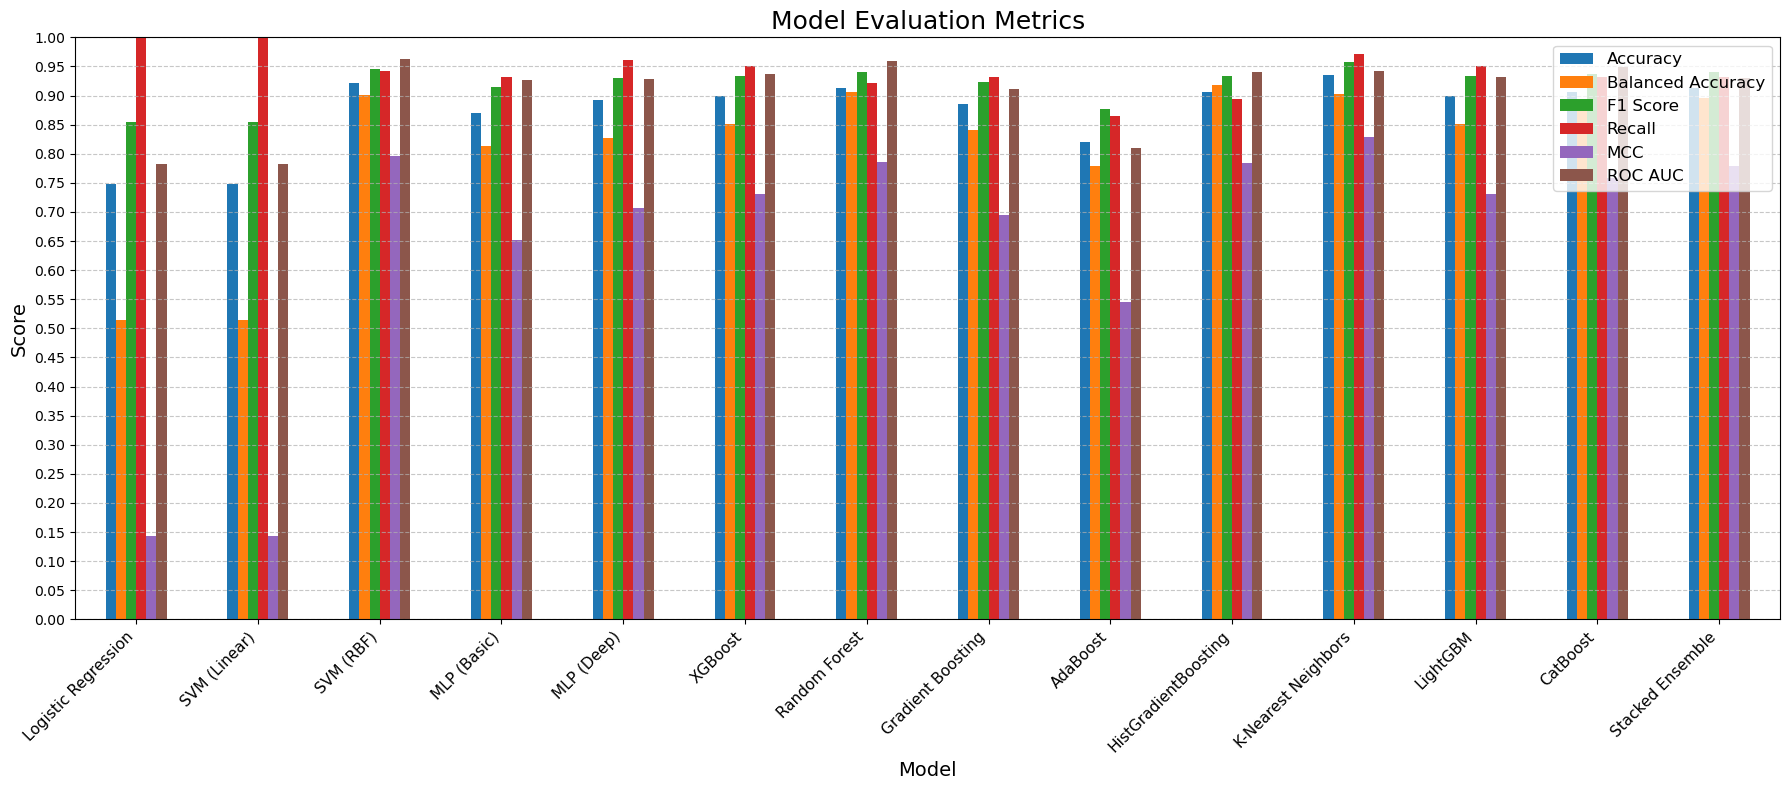

In [16]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from collections import Counter

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, recall_score,
    matthews_corrcoef, roc_auc_score, classification_report, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    HistGradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Imbalanced-learn
from imblearn.combine import SMOTEENN

# Boosting libs
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ---------------------
# Helper: Best threshold
# ---------------------
def find_best_threshold(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# ---------------------
# Evaluation Function
# ---------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n\n=== Evaluating: {name} ===")
    
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    threshold = find_best_threshold(y_test, y_proba)
    y_pred = (y_proba >= threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    bacc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy:            {acc:.4f}")
    print(f"Balanced Accuracy:   {bacc:.4f}")
    print(f"F1 Score:            {f1:.4f}")
    print(f"Recall (Sensitivity):{recall:.4f}")
    print(f"MCC:                 {mcc:.4f}")
    print(f"ROC AUC Score:       {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return {
        "Accuracy": acc,
        "Balanced Accuracy": bacc,
        "F1 Score": f1,
        "Recall": recall,
        "MCC": mcc,
        "ROC AUC": auc
    }

# ---------------------
# Load your SNP dataset
# ---------------------
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX']).values
y = data_cleaned_with_just_dx_and_snp['DX'].values

# ---------------------
# Data Augmentation BEFORE Split
# ---------------------
sampler = SMOTEENN(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

print("Original distribution:", Counter(y))
print("Resampled distribution:", Counter(y_resampled))

# ---------------------
# Train/Test Split
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

print("Train distribution:", Counter(y_train))
print("Test distribution:", Counter(y_test))

# ---------------------
# Models + Pipelines
# ---------------------
base_models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
    "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
    "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
    "Stacked Ensemble": StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
            ('mlp', MLPClassifier(max_iter=1000))
        ],
        final_estimator=LogisticRegression()
    )
}

# Optional: Basic tuning for some models
param_grid = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10]},
    "SVM (RBF)": {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']},
    "Random Forest": {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10, 20]},
}

# ---------------------
# Run all models and store metrics
# ---------------------
results = {}

for name, model in base_models.items():
    print(f"\n=== Running: {name} ===")
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    if name in param_grid:
        grid = GridSearchCV(pipe, param_grid[name], cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print("Best Parameters:", grid.best_params_)
    else:
        best_model = pipe 

    metrics = evaluate_model(name, best_model, X_train, y_train, X_test, y_test)
    results[name] = metrics

# ---------------------
# Plotting metrics
# ---------------------
df_results = pd.DataFrame(results).T

plot_metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "Recall", "MCC", "ROC AUC"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax = plt.subplots(figsize=(18, 8))
df_results[plot_metrics].plot(kind='bar', ax=ax, color=colors)

ax.set_title("Model Evaluation Metrics", fontsize=18)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Model", fontsize=14)
ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=11)
ax.legend(loc="upper right", fontsize=12)

# Set y-axis ticks and format
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.05))  # Add this line for 0.05 increments
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

ax.grid(True, linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mticker

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.ensemble import (
#     RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
#     HistGradientBoostingClassifier, StackingClassifier
# )
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import (
#     accuracy_score, balanced_accuracy_score, f1_score,
#     roc_auc_score, matthews_corrcoef, recall_score
# )
# from imblearn.combine import SMOTETomek
# from imblearn.pipeline import Pipeline

# # Generate a synthetic dataset


# # Cross-validation evaluation
# def evaluate_model_cv(model, X, y):
#     kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
#     accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

#     for train_idx, val_idx in kf.split(X, y):
#         X_tr, X_val = X[train_idx], X[val_idx]
#         y_tr, y_val = y[train_idx], y[val_idx]

#         pipeline = Pipeline([
#             ('scaler', StandardScaler()),
#             ('smt', SMOTETomek(random_state=42)),
#             ('clf', model)
#         ])

#         pipeline.fit(X_tr, y_tr)
#         y_val_pred = pipeline.predict(X_val)
#         y_val_proba = pipeline.predict_proba(X_val)[:, 1]

#         accs.append(accuracy_score(y_val, y_val_pred))
#         baccs.append(balanced_accuracy_score(y_val, y_val_pred))
#         f1s.append(f1_score(y_val, y_val_pred))
#         mccs.append(matthews_corrcoef(y_val, y_val_pred))
#         recalls.append(recall_score(y_val, y_val_pred))
#         aucs.append(roc_auc_score(y_val, y_val_proba))

#     return {
#         "Accuracy": np.mean(accs),
#         "Balanced Accuracy": np.mean(baccs),
#         "F1 Score": np.mean(f1s),
#         "Recall (Sensitivity)": np.mean(recalls),
#         "MCC": np.mean(mccs),
#         "ROC AUC": np.mean(aucs)
#     }

# # Test set evaluation
# def evaluate_on_test(model, X_train, y_train, X_test, y_test):
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('smt', SMOTETomek(random_state=42)),
#         ('clf', model)
#     ])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     y_proba = pipeline.predict_proba(X_test)[:, 1]

#     return {
#         "Test Accuracy": accuracy_score(y_test, y_pred),
#         "Test Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
#         "Test F1 Score": f1_score(y_test, y_pred),
#         "Test Recall": recall_score(y_test, y_pred),
#         "Test MCC": matthews_corrcoef(y_test, y_pred),
#         "Test ROC AUC": roc_auc_score(y_test, y_proba)
#     }

# # Define classifiers
# models = {
#     "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
#     "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
#     "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
#     "MLP (Basic)": MLPClassifier(hidden_layer_sizes=(64,), alpha=0.0001, max_iter=1000),
#     "MLP (Deep)": MLPClassifier(hidden_layer_sizes=(128, 64, 32), alpha=0.0005, learning_rate_init=0.001, max_iter=1500),
#     "XGBoost": XGBClassifier(scale_pos_weight=1, eval_metric='logloss', use_label_encoder=False),
#     "Random Forest": RandomForestClassifier(class_weight='balanced'),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "HistGradientBoosting": HistGradientBoostingClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "LightGBM": LGBMClassifier(class_weight='balanced', verbose=-1),
#     "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights='Balanced'),
#     "Stacked Ensemble": StackingClassifier(
#         estimators=[
#             ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
#             ('mlp', MLPClassifier(max_iter=1000))
#         ],
#         final_estimator=LogisticRegression()
#     )
# }

# custom_colors = [
#     '#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974',
#     '#64B5CD', '#FF7F0E', '#8C564B', '#E377C2', '#7F7F7F',
#     '#BCBD22', '#17BECF', '#D62728', '#9467BD'
# ]

# # Multiple random seeds
# random_states = [66, 20, 87, 141, 69, 90]
# all_results = {}

# for seed in random_states:
#     print(f"\n📌 Evaluating for random state: {seed}")

#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=seed, stratify=y
#     )

#     results_combined = {}

#     for name, model in models.items():
#         print(f"→ Evaluating {name}")
#         metrics_cv = evaluate_model_cv(model, X_train, y_train)
#         metrics_test = evaluate_on_test(model, X_train, y_train, X_test, y_test)
#         combined = {**metrics_cv, **metrics_test}
#         results_combined[name] = combined

#     df_results = pd.DataFrame(results_combined).T
#     all_results[seed] = df_results

#     print("\n📊 CV + Test Results:")
#     print(df_results.round(4))

#     # Plotting
#     fig, ax = plt.subplots(figsize=(26, 12))
#     plot_columns = [
#         "Accuracy", "F1 Score", "ROC AUC",
#         "Test Accuracy", "Test F1 Score", "Test ROC AUC"
#     ]
#     df_results[plot_columns].plot(kind='bar', ax=ax, color=custom_colors[:len(plot_columns)])

#     ax.set_title(f"Model CV + Test Performance - Random State {seed}", fontsize=20)
#     ax.set_ylabel("Score", fontsize=16)
#     ax.set_xlabel("Model", fontsize=16)
#     ax.set_xticklabels(df_results.index, rotation=45, ha="right", fontsize=13)
#     ax.legend(loc="upper right", fontsize=12)

#     # ✅ Set y-axis from 0.00 to 1.00 with ticks every 0.05
#     custom_yticks = np.arange(0.00, 1.01, 0.05)
#     ax.set_yticks(custom_yticks)
#     ax.set_ylim(0.00, 1.00)
#     ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
#     ax.tick_params(axis='y', labelsize=12)
#     ax.grid(axis='y', which='major', linestyle='--', alpha=0.7)

#     plt.tight_layout()
#     plt.show()
